In [0]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [0]:
df_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df_data = df_data.drop(['name'], axis=1)
X = df_data.drop(['status'], axis=1)
Y = df_data['status']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)
lr =LogisticRegression(solver='lbfgs', penalty= 'none', max_iter=10000)
lr.fit(x_train,y_train)
lr_score = lr.score(x_test,y_test)
print('Accuracy of Logistic Regression without regularization: {:.3f}'.format(lr_score))


Accuracy of Logistic Regression without regularization: 0.898


In [19]:
lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000)
lr.fit(x_train,y_train)
lr_score = lr.score(x_test,y_test)
print('Accuracy of Logistic Regression without regularization: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression without regularization: 0.898


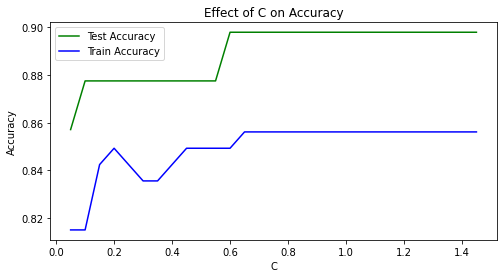

In [23]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000)
  lr.fit(x_train, y_train)
  test_accuracy.append(lr.score(x_test, y_test))
  train_accuracy.append(lr.score(x_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()